In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Cargar los datos de arrestos
url_arrestos = "https://raw.githubusercontent.com/K1000T/archivos/main/NYPD_Arrest_Data__Year_to_Date.csv"
df_arrestos = pd.read_csv(url_arrestos)

# Cargar los datos de accidentes viales
url_accidentes = "https://raw.githubusercontent.com/K1000T/archivos/main/NYCAccidents.csv"
df_accidentes = pd.read_csv(url_accidentes)

# Cargar los datos de violaciones de tráfico
url_violaciones = "https://raw.githubusercontent.com/K1000T/archivos/main/Motor_Vehicle_Crashes_-_Violation_Information__Three_Year_Window.csv"
df_violaciones = pd.read_csv(url_violaciones)

In [3]:
# Obtener los nombres de los DataFrames
df_names = [var_name for var_name in globals() if isinstance(globals()[var_name], pd.DataFrame)]

# Imprimir los nombres de los DataFrames
for name in df_names:
    print(name)


df_arrestos
df_accidentes
df_violaciones


In [5]:
# Visualizar las primeras filas de cada conjunto de datos
print("Datos de Arrestos:")
print(df_arrestos.head())

print("\nDatos de Violaciones de Tránsito:")
print(df_violaciones.head())

print("\nDatos de Accidentes Viales:")
print(df_accidentes.head())

Datos de Arrestos:
   ARREST_KEY ARREST_DATE  PD_CD                         PD_DESC  KY_CD  \
0   261249590  01/02/2023  339.0  LARCENY,PETIT FROM OPEN AREAS,  341.0   
1   261271301  01/03/2023  105.0               STRANGULATION 1ST  106.0   
2   262235280  01/20/2023  109.0        ASSAULT 2,1,UNCLASSIFIED  106.0   
3   264404265  03/01/2023  101.0                       ASSAULT 3  344.0   
4   264443630  03/02/2023  808.0                         TAX LAW  125.0   

                        OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
0                   PETIT LARCENY  PL 1552500          M           M   
1                  FELONY ASSAULT  PL 1211200          F           S   
2                  FELONY ASSAULT  PL 1200501          F           K   
3    ASSAULT 3 & RELATED OFFENSES  PL 1200001          M           S   
4  OTHER STATE LAWS (NON PENAL LA  TAX181400A          F           K   

   ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP PERP_SEX PERP_RACE  \
0                6         

<ipython-input-6-7e1ae31fd18e>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_accidents = df_accidentes.corr()


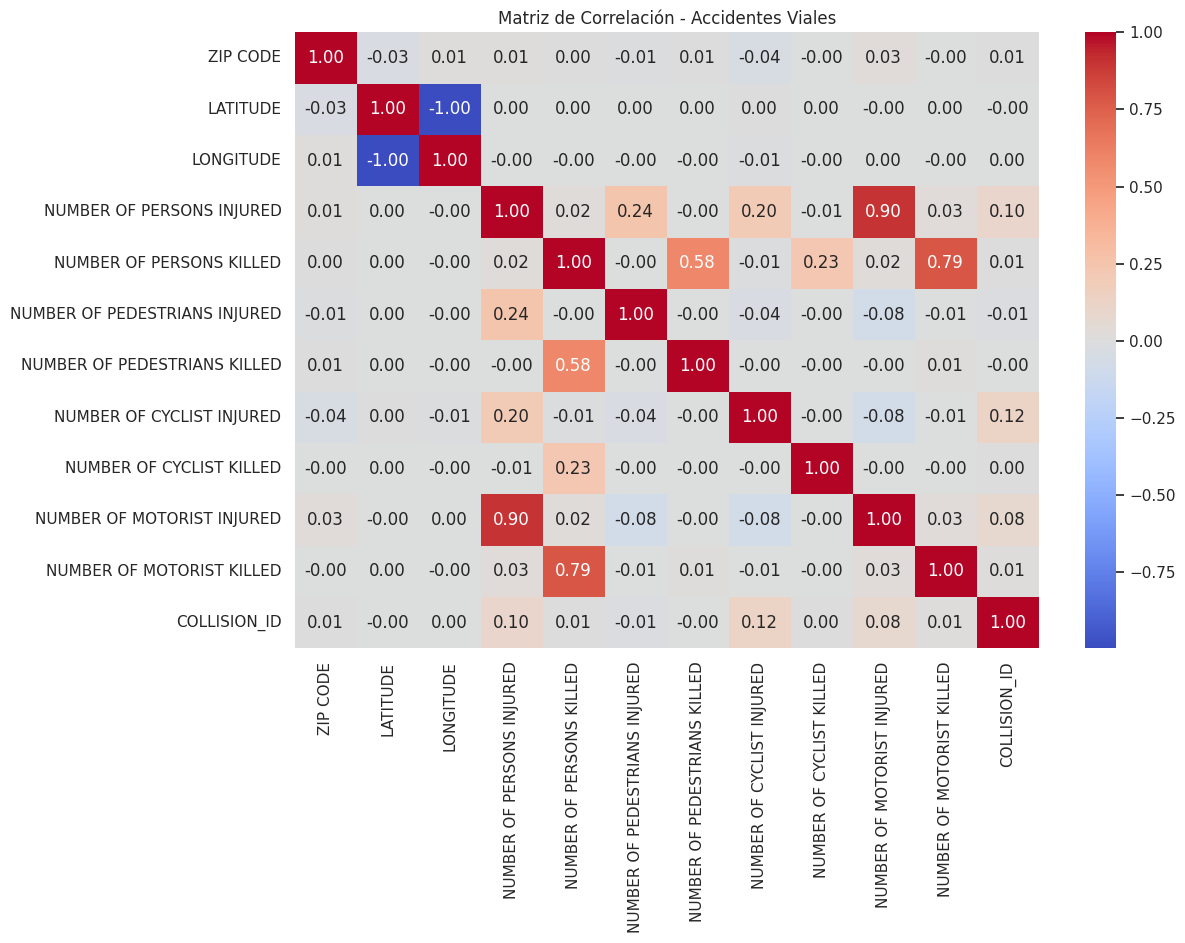

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix_accidents = df_accidentes.corr()

# Configuración de visualización
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Crear un mapa de calor para visualizar la matriz de correlación
sns.heatmap(correlation_matrix_accidents, cmap='coolwarm', annot=True, fmt=".2f")

# Añadir título
plt.title('Matriz de Correlación - Accidentes Viales')

# Mostrar la visualización
plt.show()

In [8]:
# Copiar los DataFrames originales para preservar los datos originales
df_arrestos_copy = df_arrestos.copy()
df_violaciones_copy = df_violaciones.copy()
df_accidentes_copy = df_accidentes.copy()

# Manejar valores nulos (eliminar filas con valores nulos en las columnas relevantes)
relevant_columns_arrestos = ['ARREST_DATE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE']
df_arrestos_copy = df_arrestos_copy.dropna(subset=relevant_columns_arrestos)

relevant_columns_violaciones = ['Year', 'Violation Description', 'Violation Code']
df_violaciones_copy = df_violaciones_copy.dropna(subset=relevant_columns_violaciones)

relevant_columns_accidentes = ['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE']
df_accidentes_copy = df_accidentes_copy.dropna(subset=relevant_columns_accidentes)

# Convertir columnas de fechas a tipo datetime
df_arrestos_copy['ARREST_DATE'] = pd.to_datetime(df_arrestos_copy['ARREST_DATE'])
df_violaciones_copy['Year'] = pd.to_datetime(df_violaciones_copy['Year'])
df_accidentes_copy['CRASH DATE'] = pd.to_datetime(df_accidentes_copy['CRASH DATE'])
df_accidentes_copy['CRASH TIME'] = pd.to_datetime(df_accidentes_copy['CRASH TIME'], format='%H:%M:%S', errors='coerce')

# Imprimir información sobre los conjuntos de datos después del preprocesamiento
print("Información después del preprocesamiento:")
print("\nDatos de Arrestos:")
print(df_arrestos_copy.info())

print("\nDatos de Violaciones de Tránsito:")
print(df_violaciones_copy.info())

print("\nDatos de Accidentes Viales:")
print(df_accidentes_copy.info())

<ipython-input-8-46a4a0315693>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accidentes_copy['CRASH DATE'] = pd.to_datetime(df_accidentes_copy['CRASH DATE'])
<ipython-input-8-46a4a0315693>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accidentes_copy['CRASH TIME'] = pd.to_datetime(df_accidentes_copy['CRASH TIME'], format='%H:%M:%S', errors='coerce')


Información después del preprocesamiento:

Datos de Arrestos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112571 entries, 0 to 112570
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ARREST_KEY                112571 non-null  int64         
 1   ARREST_DATE               112571 non-null  datetime64[ns]
 2   PD_CD                     112110 non-null  float64       
 3   PD_DESC                   112571 non-null  object        
 4   KY_CD                     112105 non-null  float64       
 5   OFNS_DESC                 112571 non-null  object        
 6   LAW_CODE                  112571 non-null  object        
 7   LAW_CAT_CD                111725 non-null  object        
 8   ARREST_BORO               112571 non-null  object        
 9   ARREST_PRECINCT           112571 non-null  int64         
 10  JURISDICTION_CODE         112571 non-null  int64         
 11  AGE

In [10]:
# Obtener las columnas de df_arrestos
columnas_arrestos = df_arrestos.columns

# Obtener las columnas de df_accidentes
columnas_accidentes = df_accidentes.columns

# Obtener las columnas de df_violaciones
columnas_violaciones = df_violaciones.columns

# Imprimir las columnas
print("Columnas de df_arrestos:", columnas_arrestos)
print("\nColumnas de df_accidentes:", columnas_accidentes)
print("\nColumnas de df_violaciones:", columnas_violaciones)

Columnas de df_arrestos: Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

Columnas de df_accidentes: Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLI

In [11]:
url_arrestos = "https://raw.githubusercontent.com/K1000T/archivos/main/NYPD_Arrest_Data__Year_to_Date.csv"
df_arrestos = pd.read_csv(url_arrestos)

url_accidentes = "https://raw.githubusercontent.com/K1000T/archivos/main/NYCAccidents.csv"
df_accidentes = pd.read_csv(url_accidentes)

url_violaciones = "https://raw.githubusercontent.com/K1000T/archivos/main/Motor_Vehicle_Crashes_-_Violation_Information__Three_Year_Window.csv"
df_violaciones = pd.read_csv(url_violaciones)

ML

Genero

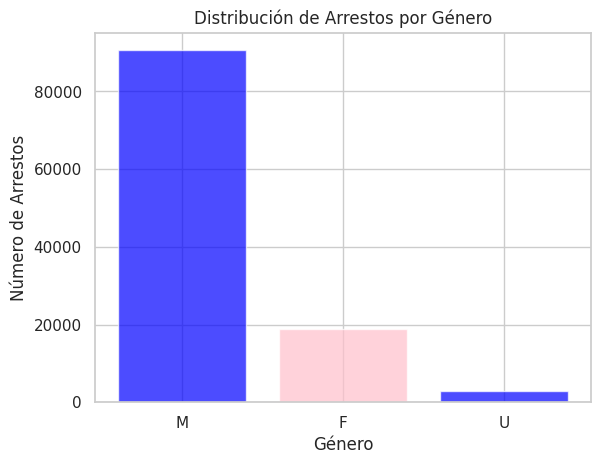

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos de arrestos
url_arrestos = "https://raw.githubusercontent.com/K1000T/archivos/main/NYPD_Arrest_Data__Year_to_Date.csv"
df_arrestos = pd.read_csv(url_arrestos)

# Contar la frecuencia de cada género
genero_counts = df_arrestos['PERP_SEX'].value_counts()

# Crear la gráfica de barras
plt.bar(genero_counts.index, genero_counts.values, color=['blue', 'pink'], alpha=0.7)

# Añadir etiquetas y título
plt.xlabel('Género')
plt.ylabel('Número de Arrestos')
plt.title('Distribución de Arrestos por Género')

# Mostrar la gráfica
plt.show()

In [9]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Cargar los datos de arrestos
url_arrestos = "https://raw.githubusercontent.com/K1000T/archivos/main/NYPD_Arrest_Data__Year_to_Date.csv"
df_arrestos = pd.read_csv(url_arrestos)

# Seleccionar características relevantes para el modelo
features = ['PD_DESC', 'OFNS_DESC', 'AGE_GROUP', 'LAW_CAT_CD', 'ARREST_BORO']

# Filtrar NaN en la columna objetivo (PERP_SEX)
df_arrestos = df_arrestos.dropna(subset=['PERP_SEX'])

# Filtrar características y columna objetivo
X = df_arrestos[features]
y = df_arrestos['PERP_SEX']

# Convertir variables categóricas a numéricas utilizando Label Encoding
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Inicializar y entrenar un clasificador de Bosque Aleatorio
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

# Imprimir resultados
print(f"Accuracy Score: {accuracy}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy Score: 0.8067066400177659

Classification Report:
              precision    recall  f1-score   support

           F       0.41      0.01      0.02      3726
           M       0.81      1.00      0.89     18184
           U       0.00      0.00      0.00       605

    accuracy                           0.81     22515
   macro avg       0.41      0.34      0.31     22515
weighted avg       0.72      0.81      0.73     22515


Confusion Matrix:
[[   46  3678     2]
 [   59 18117     8]
 [    6   599     0]]


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Cargar los datos de arrestos
url_arrestos = "https://raw.githubusercontent.com/K1000T/archivos/main/NYPD_Arrest_Data__Year_to_Date.csv"
df_arrestos = pd.read_csv(url_arrestos)

# Eliminar instancias con género desconocido ('U')
df_arrestos = df_arrestos[df_arrestos['PERP_SEX'] != 'U']

# Filtrar NaN en la columna objetivo ('PERP_SEX')
df_arrestos = df_arrestos.dropna(subset=['PERP_SEX'])

# Definir características relevantes para el modelo
features = ['OFNS_DESC', 'LAW_CAT_CD', 'ARREST_BORO']

# Filtrar características y columna objetivo
X = df_arrestos[features]
y = df_arrestos['PERP_SEX']

# Convertir variables categóricas a numéricas utilizando Label Encoding
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Inicializar y entrenar un clasificador de Bosque Aleatorio
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

# Imprimir resultados
print(f"Accuracy Score: {accuracy}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy Score: 0.828291124800365

Classification Report:
              precision    recall  f1-score   support

           F       0.67      0.00      0.01      3768
           M       0.83      1.00      0.91     18147

    accuracy                           0.83     21915
   macro avg       0.75      0.50      0.46     21915
weighted avg       0.80      0.83      0.75     21915


Confusion Matrix:
[[   10  3758]
 [    5 18142]]


Edad

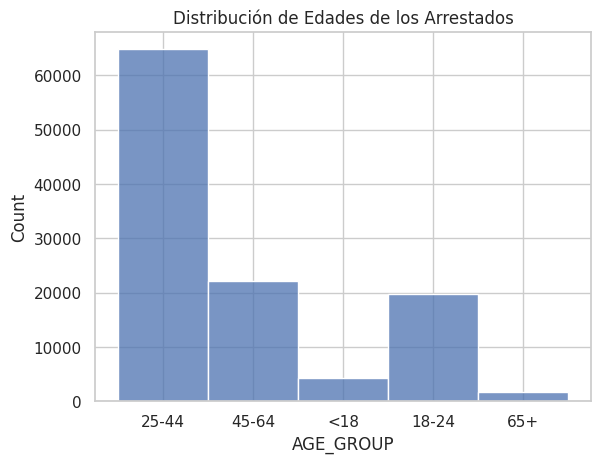

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ejemplo para df_arrestos
# Histograma de edades de los arrestados
sns.histplot(df_arrestos['AGE_GROUP'], bins=20)
plt.title('Distribución de Edades de los Arrestados')
plt.show()

# Hacer lo mismo para df_accidentes y df_violaciones

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Cargar los datos de arrestos
url_arrestos = "https://raw.githubusercontent.com/K1000T/archivos/main/NYPD_Arrest_Data__Year_to_Date.csv"
df_arrestos = pd.read_csv(url_arrestos)

# Seleccionar características relevantes para el modelo
features = ['PD_DESC', 'OFNS_DESC', 'LAW_CAT_CD', 'ARREST_BORO']

# Filtrar NaN en la columna objetivo (AGE_GROUP)
df_arrestos = df_arrestos.dropna(subset=['AGE_GROUP'])

# Filtrar características y columna objetivo
X = df_arrestos[features]
y = df_arrestos['AGE_GROUP']

# Convertir variables categóricas a numéricas utilizando Label Encoding
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Inicializar y entrenar un clasificador de Bosque Aleatorio
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

# Imprimir resultados
print(f"Accuracy Score: {accuracy}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy Score: 0.5714856762158561

Classification Report:
              precision    recall  f1-score   support

       18-24       0.37      0.03      0.06      3962
       25-44       0.58      0.98      0.73     12914
       45-64       0.30      0.01      0.02      4460
         65+       0.00      0.00      0.00       346
         <18       0.11      0.00      0.00       833

    accuracy                           0.57     22515
   macro avg       0.27      0.21      0.16     22515
weighted avg       0.46      0.57      0.43     22515


Confusion Matrix:
[[  119  3822    17     0     4]
 [  127 12706    67     2    12]
 [   28  4391    40     0     1]
 [    2   336     8     0     0]
 [   45   785     1     0     2]]


Raza

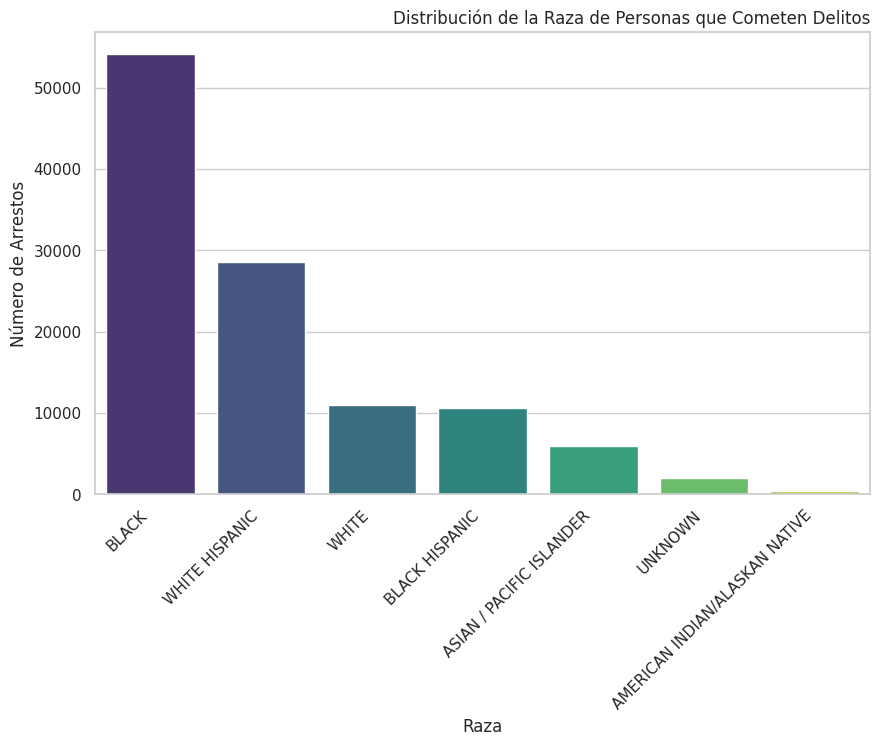

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos de arrestos
url_arrestos = "https://raw.githubusercontent.com/K1000T/archivos/main/NYPD_Arrest_Data__Year_to_Date.csv"
df_arrestos = pd.read_csv(url_arrestos)

# Explorar la distribución de la raza de las personas que cometen delitos
race_counts = df_arrestos['PERP_RACE'].value_counts()

# Visualización usando un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=race_counts.index, y=race_counts.values, palette='viridis')
plt.title('Distribución de la Raza de Personas que Cometen Delitos', loc='right')
plt.xlabel('Raza')
plt.ylabel('Número de Arrestos')
plt.xticks(rotation=45, ha='right')
plt.show()

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Cargar los datos de arrestos
url_arrestos = "https://raw.githubusercontent.com/K1000T/archivos/main/NYPD_Arrest_Data__Year_to_Date.csv"
df_arrestos = pd.read_csv(url_arrestos)

# Seleccionar características relevantes para el modelo (puedes ajustar esto según tus necesidades)
features = ['PD_DESC', 'OFNS_DESC', 'LAW_CAT_CD', 'ARREST_BORO', 'AGE_GROUP', 'PERP_SEX']

# Filtrar NaN en la columna objetivo (PERP_RACE)
df_arrestos = df_arrestos.dropna(subset=['PERP_RACE'])

# Filtrar características y columna objetivo
X = df_arrestos[features]
y = df_arrestos['PERP_RACE']

# Convertir variables categóricas a numéricas utilizando Label Encoding
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Inicializar y entrenar un clasificador de Bosque Aleatorio
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

# Imprimir resultados
print(f"Accuracy Score: {accuracy}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy Score: 0.48825227626027096

Classification Report:
                                precision    recall  f1-score   support

AMERICAN INDIAN/ALASKAN NATIVE       0.14      0.01      0.02        81
      ASIAN / PACIFIC ISLANDER       0.39      0.07      0.12      1207
                         BLACK       0.52      0.87      0.65     10796
                BLACK HISPANIC       0.26      0.04      0.07      2145
                       UNKNOWN       0.15      0.02      0.04       415
                         WHITE       0.35      0.10      0.15      2189
                WHITE HISPANIC       0.37      0.21      0.27      5682

                      accuracy                           0.49     22515
                     macro avg       0.31      0.19      0.19     22515
                  weighted avg       0.43      0.49      0.41     22515


Confusion Matrix:
[[   1    3   58    1    0    5   13]
 [   2   86  772   12   11   37  287]
 [   3   50 9396  104   19  169 1055]
 [   0   13 

Accidentes

In [39]:
import pandas as pd

# URL del conjunto de datos de accidentes
url_accidentes = "https://raw.githubusercontent.com/K1000T/archivos/main/NYCAccidents.csv"

# Cargar los datos de accidentes
df_accidentes = pd.read_csv(url_accidentes)

# Mostrar las columnas del DataFrame
print("Columnas de df_accidentes:")
print(df_accidentes.columns)

Columnas de df_accidentes:
Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')


Persona involucrada

In [42]:
import pandas as pd

# URL del conjunto de datos de accidentes
url_accidentes = "https://raw.githubusercontent.com/K1000T/archivos/main/NYCAccidents.csv"

# Cargar los datos de accidentes
df_accidentes = pd.read_csv(url_accidentes)

# Mostrar información sobre los involucrados en accidentes
print("Información sobre los involucrados en accidentes:")
print("Número total de accidentes:", len(df_accidentes))
print("Número total de personas involucradas:", df_accidentes['NUMBER OF PERSONS INJURED'].sum())
print("Número total de peatones involucrados:", df_accidentes['NUMBER OF PEDESTRIANS INJURED'].sum())
print("Número total de ciclistas involucrados:", df_accidentes['NUMBER OF CYCLIST INJURED'].sum())
print("Número total de automovilistas involucrados:", df_accidentes['NUMBER OF MOTORIST INJURED'].sum())

# Estadísticas adicionales
print("\nEstadísticas adicionales:")
print("Número promedio de personas involucradas por accidente:", df_accidentes['NUMBER OF PERSONS INJURED'].mean())
print("Porcentaje de accidentes con al menos un peatón involucrado:",
      (len(df_accidentes[df_accidentes['NUMBER OF PEDESTRIANS INJURED'] > 0]) / len(df_accidentes)) * 100, "%")
print("Porcentaje de accidentes con al menos un ciclista involucrado:",
      (len(df_accidentes[df_accidentes['NUMBER OF CYCLIST INJURED'] > 0]) / len(df_accidentes)) * 100, "%")
print("Porcentaje de accidentes con al menos un automovilista involucrado:",
      (len(df_accidentes[df_accidentes['NUMBER OF MOTORIST INJURED'] > 0]) / len(df_accidentes)) * 100, "%")

Información sobre los involucrados en accidentes:
Número total de accidentes: 74881
Número total de personas involucradas: 27448
Número total de peatones involucrados: 4099
Número total de ciclistas involucrados: 3273
Número total de automovilistas involucrados: 20076

Estadísticas adicionales:
Número promedio de personas involucradas por accidente: 0.366554933828341
Porcentaje de accidentes con al menos un peatón involucrado: 5.279042747826551 %
Porcentaje de accidentes con al menos un ciclista involucrado: 4.262763584888022 %
Porcentaje de accidentes con al menos un automovilista involucrado: 17.932452825149237 %


Modelo de clasificación que prediga si un accidente involucrará al menos un peatón, ciclista o automovilista

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Supongamos que tu DataFrame de accidentes se llama df_accidentes
# Asegúrate de tener las columnas adecuadas para las variables de interés
# En este ejemplo, estoy utilizando 'NUMBER OF PEDESTRIANS INJURED',
# 'NUMBER OF CYCLIST INJURED', 'NUMBER OF MOTORIST INJURED' como variables de interés.

# Crear la variable objetivo binaria (1 si hay al menos un peatón, ciclista o automovilista involucrado, 0 en caso contrario)
df_accidentes['TARGET'] = ((df_accidentes['NUMBER OF PEDESTRIANS INJURED'] > 0) |
                           (df_accidentes['NUMBER OF CYCLIST INJURED'] > 0) |
                           (df_accidentes['NUMBER OF MOTORIST INJURED'] > 0)).astype(int)

# Seleccionar las características relevantes para el modelo (puedes ajustar esto según tus necesidades)
features = ['CRASH TIME', 'BOROUGH', 'LATITUDE', 'LONGITUDE', 'CONTRIBUTING FACTOR VEHICLE 1']

# Filtrar características y columna objetivo
X = df_accidentes[features]
y = df_accidentes['TARGET']

# Manejar datos categóricos si es necesario (puede requerir más preprocesamiento)
X_encoded = pd.get_dummies(X)

# Imputar valores NaN con la media
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Inicializar y entrenar un clasificador de Bosque Aleatorio
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

# Imprimir resultados
print(f"Accuracy Score: {accuracy}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy Score: 0.7091540361888229

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.93      0.82     10835
           1       0.42      0.14      0.21      4142

    accuracy                           0.71     14977
   macro avg       0.58      0.53      0.52     14977
weighted avg       0.65      0.71      0.65     14977


Confusion Matrix:
[[10041   794]
 [ 3562   580]]


Predecir numeros de personas involucradas

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Cargar tus datos de accidentes (reemplaza 'tu_ruta' con la ruta real)
df_accidentes = pd.read_csv("https://raw.githubusercontent.com/K1000T/archivos/main/NYCAccidents.csv")

# Seleccionar características relevantes para el modelo
features = ['BOROUGH', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PEDESTRIANS INJURED',
            'NUMBER OF CYCLIST INJURED', 'NUMBER OF MOTORIST INJURED']

# Filtrar NaN en la columna objetivo (NUMBER OF PERSONS INJURED)
df_accidentes = df_accidentes.dropna(subset=['NUMBER OF PERSONS INJURED'])

# Filtrar características y columna objetivo
X = df_accidentes[features]
y = df_accidentes['NUMBER OF PERSONS INJURED']

# Convertir variables categóricas a numéricas utilizando One-Hot Encoding
X_encoded = pd.get_dummies(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Escalar las características para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar y entrenar un regresor de Bosque Aleatorio
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = regressor.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Imprimir resultados
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Mean Squared Error: 0.0017372304199772984
R2 Score: 0.9966533125679852


ML no supervisado

k-means

In [53]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Cargar datos de accidentes
url_accidentes = "https://raw.githubusercontent.com/K1000T/archivos/main/NYCAccidents.csv"
df_accidentes = pd.read_csv(url_accidentes)

# Seleccionar características relevantes para el modelo
features_accidentes = ['LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']

# Filtrar NaN
df_accidentes = df_accidentes.dropna(subset=features_accidentes)

# Escalar las características
scaler = StandardScaler()
X_accidentes = scaler.fit_transform(df_accidentes[features_accidentes])

# Aplicar K-Means
kmeans_accidentes = KMeans(n_clusters=3, random_state=42)
df_accidentes['Cluster'] = kmeans_accidentes.fit_predict(X_accidentes)

# Mostrar información de los clusters
print("Información de Clusters de Accidentes:")
for cluster in range(3):
    cluster_data = df_accidentes[df_accidentes['Cluster'] == cluster]
    print(f"\nCluster {cluster}:\n")
    print(cluster_data[['LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']])
    print("="*40)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Información de Clusters de Accidentes:

Cluster 0:

        LATITUDE  LONGITUDE  NUMBER OF PERSONS INJURED  \
0      40.892100 -73.833760                          0   
1      40.690500 -73.919914                          2   
2      40.816500 -73.946556                          1   
3      40.824720 -73.892960                          0   
4      40.649890 -73.933890                          0   
...          ...        ...                        ...   
74876  40.826810 -73.896510                          0   
74877  40.582935 -73.959210                          0   
74878  40.848553 -73.830055                          0   
74879  40.753624 -73.969440                          0   
74880  40.726875 -73.830960                          2   

       NUMBER OF PERSONS KILLED  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  
...                         ...  
74876        